In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import os

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

In [22]:
model = Sequential([
    layers.Rescaling(1/255.),
    layers.Conv1D(8, 2, activation='relu'),
    layers.MaxPool1D(),
    layers.BatchNormalization(),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPool1D(),
    layers.BatchNormalization(),
    layers.Conv1D(128, 2, activation='relu'),
    layers.MaxPool1D(),
    layers.BatchNormalization(),
    layers.GlobalMaxPool1D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5159 - accuracy: 0.8438 - val_loss: 0.1434 - val_accuracy: 0.9541
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1900 - accuracy: 0.9427 - val_loss: 0.0996 - val_accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1454 - accuracy: 0.9552 - val_loss: 0.0833 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9619 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9652 - val_loss: 0.0756 - val_accuracy: 0.9761


<Axes: >

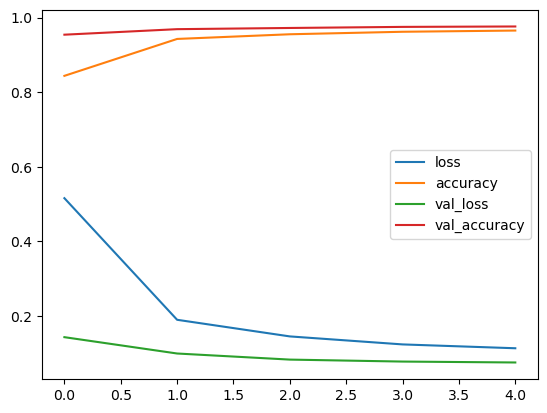

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot()

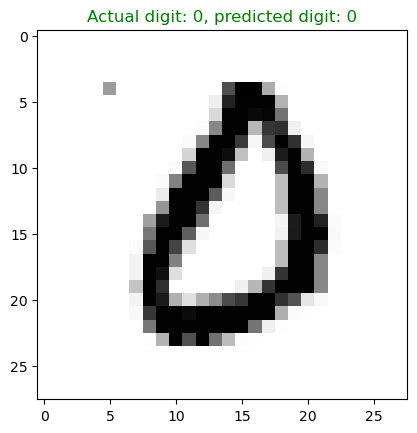

In [58]:
import random
from IPython.display import clear_output

def random_test_image(x_test, y_test):
    i = random.randint(0,len(x_test))
    y_true = y_test[i]
    image = x_test[i]
    pred_probs = model.predict(tf.expand_dims(image, axis=0))
    y_pred = tf.argmax(pred_probs[0]).numpy()
    
    if y_true == y_pred:
        c = 'g'
    else:
        c = 'r'
    clear_output()
    plt.imshow(image, cmap='Greys')
    plt.title(f'Actual digit: {y_true}, predicted digit: {y_pred}', {'color':c})
    plt.show()
    
random_test_image(x_test, y_test)

In [63]:
def get_wrong_preds(x_test, y_test):
    pred_probs = model.predict(x_test)
    y_preds = tf.argmax(pred_probs, axis=1)
    
    wrong_i = []
    
    for i in range(len(y_preds)):
        if y_preds[i] != y_test[i]:
            wrong_i.append(i)
    return wrong_i, y_preds

wrong_is, y_preds = get_wrong_preds(x_test, y_test)

313/313 [==============================] - 0s 1ms/step


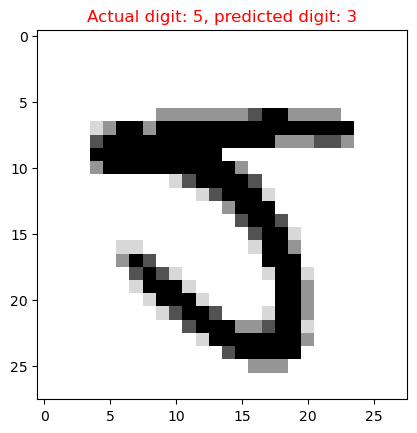

In [66]:
def plot_random_wrong(x_test, y_test, wrong_i, y_preds):
    random_wrong_image = random.choice(wrong_i)
    clear_output()
    plt.imshow(x_test[random_wrong_image], cmap='Greys')
    plt.title(f'Actual digit: {y_test[random_wrong_image]}, predicted digit: {y_preds[random_wrong_image]}', {'color':'r'})
    plt.show()
plot_random_wrong(x_test, y_test, wrong_is, y_preds)